In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from scipy.stats import *
import random

# Law of large numbers

## Task 1 Coin toss
Try simulating coin tosses using the coinToss function. The function outputs the number of trials, the percentages of heads and tails, and plots a graph showing the total percentage of heads over all trials from 1 up to the specified number of trials.

- What characteristics does the plotted curve possess?
- As the number of trials increases, what value does the percentage of heads approach? How can this be rationalized?

In [89]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number+1) #number of tosses
    for i in rangeList: 
        flip = random.randint(0, 1) #returns 0 (tails), or 1 (head)
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        proportionList.append(orli/i)
    
    print("number of trials: "+ str(number))
    print("share of heads: " + str(orli/i) + " share of tails: " + str(reshki/i))
    
    # the graph
    plt.figure(figsize=(40, 10), dpi=30)
    plt.plot(rangeList, proportionList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))

number of trials: 5
share of heads: 0.8 share of tails: 0.2
None
number of trials: 5000
share of heads: 0.4856 share of tails: 0.5144
None


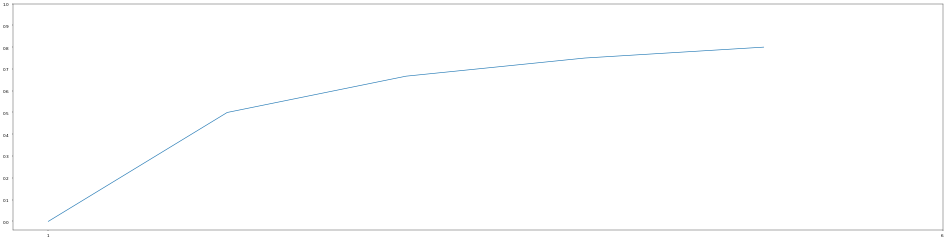

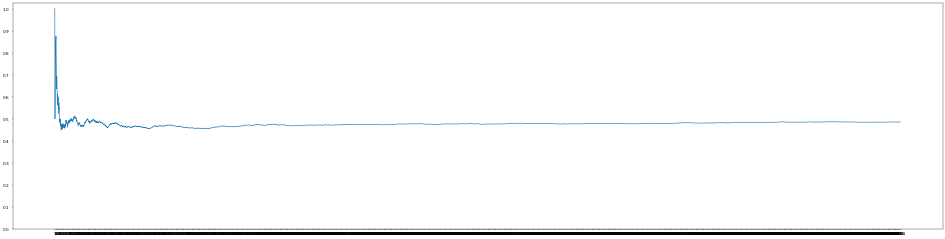

In [90]:
print (coinToss(5))
print (coinToss(5000))

**Answer**
The algorithm exhibits the phenomenon of the law of large numbers, which implies that as the sample size increases, the sample mean converges to the expected value (in this case, 1/2). This trend is also evident from the graph.

## Task 2 Law of large numbers
Try diceRoll function to simulate dice rolls. The function models a series of rolls of two dice and outputs the probability that the sum on the dice will be greater than the parameter k (the proportion of outcomes where the sum is greater than k, relative to all outcomes).

1. What values will the probability converge to at a fixed k and increasing number? What happens if k is set to 6 or 8? How are the obtained probabilities related to the theoretical probabilities?
2. What will the total sum of rolls divided by their number converge to? What will the average difference between the current roll and the obtained mean value converge to?

In [32]:
def diceRoll (number, k):
    sumList,recordList= [], [] 
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    print('The probability that dice sum exceedes ' +str(k) +' after ' + str(number) + 
          ' trials: ' + str(sum([x > k for x in sumList])/number))

In [33]:
diceRoll(10000, 4)

The probability that dice sum exceedes 4 after 10000 trials: 0.8325


*1. What values will the probability converge to at a fixed k and increasing number?*
 **Experimental probability will converge to the theoretical one calculated below**

In [64]:
def theoretical_probability (k):

    # elementary outcomes' probability
    k2 = 1/36 
    k3 = 2/36
    k4 = 3/36
    k5 = 4/36
    k6 = 5/36
    k7 = 6/36
    k8 = 5/36
    k9 = 4/36
    k10= 3/36
    k11= 2/36
    k12= 1/36 

    # expected value
    M = 2 * 1/(6*6) + 3* 2/(6*6) + 4* 3/(6*6) \
        + 5* 4/(6*6) + 6* 5/(6*6) + 7* 6/(6*6) \
        + 8* 5/(6*6) + 9* 4/(6*6) + 10* 3/(6*6) \
        + 11* 2/(6*6) + 12* 1/(6*6)

    # probability that the sum overcomes k 
    Over2 = k3+k4+k5+k6+k7+k8+k9+k10+k11+k12
    Over3 = k4+k5+k6+k7+k8+k9+k10+k11+k12
    Over4 = k5+k6+k7+k8+k9+k10+k11+k12
    Over5 = k6+k7+k8+k9+k10+k11+k12
    Over6 = k7+k8+k9+k10+k11+k12
    Over7 = k8+k9+k10+k11+k12
    Over8 = k9+k10+k11+k12
    Over9 = k10+k11+k12
    Over10= k11+k12
    Over11= k12
    Over12= 0

    # interactive part
    dictionary = {2:Over2, 3:Over3, 4:Over4, 
                  5:Over5, 6:Over6, 7:Over7, 
                  8:Over8, 9:Over9, 10:Over10, 
                  11:Over11, 12:Over12}

    print (f'theoretical probability of the outcome being over {k} is {(round(dictionary[k], 4) * 100)}%')
    print (f'expected values is = {int(M)}')

k = int(input('enter a desirable 2d6 outcome:'))

theoretical_probability (k)

enter a desirable 2d6 outcome: 5


theoretical probability of the outcome being over 5 is 72.22%
expected values is = 7


**Answer**
Increasing k will result in a reduction in the likelihood of a positive outcome. As the number of trials increases, the experimental probability will increasingly approximate the theoretical probability. The sample mean will converge to the expected value of 7. The average difference will tend towards zero.

## Task 4 Monte Carlo

The algorithm selects two values, x and y, from the range between -1 and 1, and constructs a point in the plane with coordinates (x, y). Points that fall inside a unit circle centered at zero are colored blue, while points outside the circle are colored red. The number of points generated is determined by the n parameter.

- What is the blue dot proportion tending to? How is it related to the areas of geometric shapes? 
- Analyze how the proportion of blue dots changes with an increase in the number of dots and compare it to the theoretical value of the area.

In [35]:
def plot_circle(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('Number of dots inside the circle:', len(insideX))
  print('Number of dots outside the circle:', (len(outsideX)))
  print('Share of dots inside the circle:', len(insideX)/(len(outsideX)+len(insideX)))
  
  # the plot
  fig, ax = plt.subplots(1)
  ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None)
  ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None)
  ax.set_aspect('equal')
  fig.show()

Number of dots inside the circle: 3925
Number of dots outside the circle: 1075
Share of dots inside the circle: 0.785


C:\Users\Ivan\AppData\Local\Temp\ipykernel_8828\3906344471.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


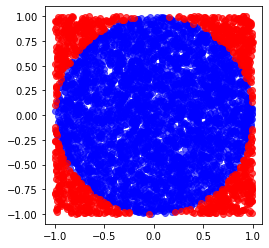

In [36]:
plot_circle(5000)

In [13]:
# area of the circle
r = symbols ('r')
S = pi*r**2
display (S)
S.subs ({pi:3.1415, r:0.5})

pi*r**2

0.785375000000000

**Answer**
With an increasing number of points, the experimental proportion of blue points in the total sample approaches the theoretical one, which is approximately 78.5%, and is equal to the ratio of the area of the circle to the area of the square in which it is inscribed.

## Task 3 Two dice

Below are the tables with sums and products of values when throwing two dice. Using these tables, calculate the probabilities of the following complex events.
<p align="left">
  <img src="https://drive.google.com/uc?id=1If1NDfwPCfLC6JHqxa5IDgXLRzrbB-sI" alt="drawing" width="300"/>
</p>
<p align="left">
  <img src="https://drive.google.com/uc?id=1vWNTqND6br6XzESVSwqKjK9AqeN0-k-4" alt="drawing" width="300"/>
</p>

1. The probability that the resulting sum of the values on the dice is an odd number
2. The probability that the resulting sum of values on the dice is a multiple of three.
3. The probability that the sum will be less than five or greater than ten.
4. The probability that the product of the values will be equal to twelve.
5. Probability that the product of values is odd.

In [23]:
# 1. The probability that the resulting sum of the values on the dice is an odd number
18/36

0.5

In [24]:
# 2. The probability that the resulting sum of values on the dice is a multiple of three.
12/36

0.3333333333333333

In [25]:
# 3. The probability that the sum will be less than five or greater than ten.
(6+3)/36

0.25

In [26]:
# 4. The probability that the product of the values will be equal to twelve.
4/36

0.1111111111111111

In [27]:
# 5. Probability that the product of values is odd.
9/36

0.25

In [28]:
# 6. The probability that the sum of the values will be greater than or equal to their product.
12/36

0.3333333333333333

# Bayes' theorem
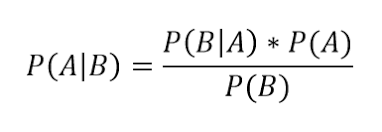

## Task 5 Conditional probability (Titanic)
Download data from $titanic.csv$, limited to the folowing parameters: $'PassengerId','Survived','Pclass','Sex'$

1. Write in P_fem the probability that a random passenger on the Titanic is a woman.
2. Write in P_1class the probability that a random Titanic passenger was traveling in first class.
3. Write in P_surv the probability that a random passenger on the Titanic survived.
4. Write in P_fem_surv the probability that the passenger is a woman and that the passenger survived the crash at the same time.
5. Find the conditional probability that the passenger will survive if the passenger is a woman.
6. By analogy, find the probability that the passenger will survive if the passenger was traveling in first class.
7. Find the probability that the passenger will survive, provided that the passenger was traveling in first class and is a woman.
8. Find the probability that the passenger will survive, provided that the passenger was traveling in second class and is a man.
9. Using the calculated probabilities, find the probability that a randomly selected passenger is a woman if we know that the passenger survived.
10. Using the calculated probabilities, find the probability that a randomly selected passenger was traveling in first class if we know that the passenger survived.
11. Compare the obtained probabilities with the unconditional probabilities of the corresponding events. Explain the difference in meanings.

In [35]:
titanic = pd.read_csv("data/train.csv")
X = titanic[['PassengerId','Survived','Pclass','Sex']]
X.head(2)

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female


In [39]:
# 1. Write in P_fem the probability that a random passenger on the Titanic is a woman.
P_fem = len (X[X.Sex=='female']) / len (X)
P_fem

0.35241301907968575

In [50]:
# 2. Write in P_1class the probability that a random Titanic passenger was traveling in first class.
P_1class = len (X[X.Pclass==1]) / len (X)
P_1class

0.24242424242424243

In [51]:
# 3. Write in P_surv the probability that a random passenger on the Titanic survived.
P_surv = len (X[X.Survived==1]) / len (X)
P_surv

0.3838383838383838

In [52]:
# 4. Write in P_fem_surv the probability that the passenger is a woman 
# and that the passenger survived the crash at the same time.
P_fem_surv = len (X[(X.Survived==1) & (X.Sex=='female')]) / len (X)
P_fem_surv

0.2615039281705948

In [53]:
# 5. Find the conditional probability that the passenger will survive if the passenger is a woman.
P_cond_surv_fem = P_fem_surv / P_fem
P_cond_surv_fem

0.7420382165605095

In [54]:
# 6. By analogy, find the probability that the passenger will survive 
# if the passenger was traveling in first class.
P_1class_surv = len (X[(X.Survived==1) & (X.Pclass==1)]) / len (X)
P_cond_surv_1class = P_1class_surv / P_1class
P_cond_surv_1class

0.6296296296296297

In [55]:
# 7. Find the probability that the passenger will survive, 
# provided that the passenger was traveling in first class and is a woman.
P_surv_1class_fem = len (X[(X.Sex=='female') & (X.Pclass==1) & (X.Survived==1)]) / len (X)
P_1class_fem = len (X[(X.Sex=='female') & (X.Pclass==1)]) / len (X)
P_cond_surv_1class_fem = P_surv_1class_fem / P_1class_fem
P_cond_surv_1class_fem

0.9680851063829786

In [56]:
# 8. Find the probability that the passenger will survive, 
# provided that the passenger was traveling in second class and is a man.
P_surv_2class_male = len (X[(X.Sex=='male') & (X.Pclass==2) & (X.Survived==1)]) / len (X)
P_2class_male = len (X[(X.Sex=='male') & (X.Pclass==2)]) / len (X)
P_cond_surv_2class_male = P_surv_2class_male / P_2class_male
P_cond_surv_2class_male

0.1574074074074074

In [57]:
# 9. Using the calculated probabilities, find the probability that a randomly selected passenger 
# is a woman if we know that the passenger survived.
P_cond_fem_surv = P_fem_surv / P_surv
P_cond_fem_surv

0.6812865497076023

In [58]:
# 10. Using the calculated probabilities, find the probability that a randomly selected passenger 
# was traveling in first class if we know that the passenger survived.
P_cond_1class_1class = P_1class_surv / P_surv
P_cond_1class_1class

0.3976608187134503

In [63]:
# 11. Compare the obtained probabilities with the unconditional probabilities of the corresponding events. 
# Explain the difference in meanings.
print ('(hypothesis) If events occur in a single space of elementary outcomes, then the a posteriori probability will be higher than the a priori one, because the event that separates them narrows the space of outcomes, while the number of successful outcomes remains the same. Thus in a single space of elementary outcomes, all conditional probabilities will be higher than the corresponding unconditional ones.')

(hypothesis) If events occur in a single space of elementary outcomes, then the a posteriori probability will be higher than the a priori one, because the event that separates them narrows the space of outcomes, while the number of successful outcomes remains the same. Thus in a single space of elementary outcomes, all conditional probabilities will be higher than the corresponding unconditional ones.


## Task 6 Conditional probability (Spam)
Download data from $letters.xlsx$ 
- The `spam` column indicates whether a message is spam or not, 
- The `spam_words` - whether it contains words  usual for spam messages.

1. Determine the ratio of spam emails to the total number of emails.
2. Determine the ratio of emails that contain words similar to spam to the total number of emails.
3. Determine the likelihood that an email contains spam-like words, given that it is classified as spam.
4. Determine the likelihood that an email is classified as spam given that it contains spam-like words.

In [36]:
df = pd.read_excel('data/letters.xlsx', sheet_name='Sheet1', index_col='id_letter')
df.head(2)

,spam,spam_words
id_letter,,
1,да,нет
2,да,да


In [70]:
# 1. Determine the ratio of spam emails to the total number of emails.
P_spam_letters = len (df[df.spam == 'да']) / len (df)
P_spam_letters

0.3548387096774194

In [71]:
# 2. Determine the ratio of emails that contain words similar to spam to the total number of emails.
P_letters_with_spam_words = len (df[df.spam_words == 'да']) / len (df)
P_letters_with_spam_words

0.375

In [72]:
# 3. Determine the probability that an email contains spam-like words, given that it is classified as spam.
P_spam_letters_with_spam_words = len (df[(df.spam_words == 'да') & (df.spam == 'да')]) / len (df)
P_cond_spam_words_in_spam_letters = P_spam_letters_with_spam_words / P_spam_letters
P_cond_spam_words_in_spam_letters

0.3636363636363636

In [73]:
# 4. Determine the probability that an email is classified as spam given that it contains spam-like words.
P_cond_spam_letters_with_spam_words = P_spam_letters_with_spam_words / P_letters_with_spam_words
P_cond_spam_letters_with_spam_words

0.3440860215053763

# Distributions

## Task 7 Binomial
There is a batch of ten parts. The probability that a part is defective in this batch is `4/5=0.8`. Determine the probability that half of the parts are defective and write a function to calculate it.

In [74]:
def binomial_distribution (n, k, p):
    C = factorial (n) / (factorial (k) * factorial(n-k))
    return C * p**k * (1-p)**(n-k)

binomial_distribution (10, 5, 0.8)

0.0264241152000000

## Task 8 Binomial
A goalkeeper saves seven consecutive strikes. The probability of this happening is 0.3 each time. Determine the probability of the goalkeeper saving at least three strikes

In [75]:
P = binomial_distribution (7, 3, 0.3) + \
    binomial_distribution (7, 4, 0.3) + \
    binomial_distribution (7, 5, 0.3) + \
    binomial_distribution (7, 6, 0.3) + \
    binomial_distribution (7, 7, 0.3)
P

0.352930500000000

## Task 9 Poisson
You rolled a pair of dice 10 times in a row. Consider the probability of getting a pair of 2 sixes 1 time. Find it:
- using the binomial distribution;
- using the Poisson distribution using the law of rare events.

In [76]:
binomial_distribution (10, 1, 1/36)

0.215569538256984

In [77]:
def poisson_distribution (k, λ):
    return (exp(1)**(-λ) * λ**k) / factorial (k)

# If n=>∞ U p=>0:  λ=np
poisson_distribution (1, 10/36)

0.210406980110268

# Continuous random variable

## Task 10 CDF & PDF problem
CDF of a continuous random variable: \
$F(x) = 0,$ if $x<= 2$ \
$F(x) = ((x-2)**5) / 32,$ if $2<x<=4$ \
$F(x) = 1,$ if $x>4$

Find f(x), M(x), D(x), σ(x)

Piecewise((0, x <= 2), ((x - 2)**5/32, x <= 4), (1, True))

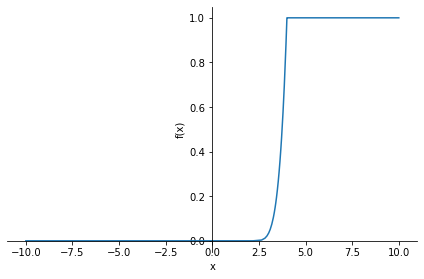

In [78]:
x = Symbol('x')
F = Piecewise((0, x<=2), 
              (((x-2)**5) / 32, x<=4), 
              (1, True))
display (F)
plot (F)

In [79]:
# probability density 
f = F.diff()

# mathematical expectation
M = integrate(x * f,(x,-oo, 2)) + \
    integrate(x * f,(x,2,4)) + \
    integrate(x * f,(x,4,oo))

# dispersion (variance)
D = integrate(x**2 * f,(x,-oo, 2)) + \
    integrate(x**2 * f,(x, 2, 4)) + \
    integrate(x**2 * f,(x, 4, oo)) - \
    M**2
# standard deviation
σ = sqrt (D)

print (f'probability density')
display (f)
print ( f'mathematical expectation: {M}\n'
        f'dispersion: {D}\n'
        f'standard deviation {σ}')

probability density


Piecewise((0, x <= 2), (5*(x - 2)**4/32, x <= 4), (0, True))

mathematical expectation: 11/3
dispersion: 5/63
standard deviation sqrt(35)/21


## Task 11 CDF & PDF problem
CDF of a continuous random variable: \
$F(x) = 0,$ if $x<= 0$ \
$F(x) = 1/196 * (2*x**3 + 4*x**2 +x),$ if $2<x<=4$ \
$F(x) = 1,$ if $x>4$

Find f(x), M(x), D(x)
Find probability of X being [1;3]CDF & PDF problem¶

Piecewise((0, x <= 0), (0.0102040816326531*x**3 + 0.0204081632653061*x**2 + 0.00510204081632653*x, x <= 4), (1, True))

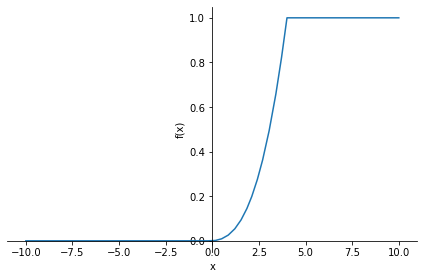

In [80]:
F = Piecewise((0, x<=0), 
              (1/196 * (2*x**3 + 4*x**2 +x), x<=4), 
              (1, True))
display (F)
plot (F)

In [30]:
# PDF 
f = F.diff()

# Expectation
M = integrate(x * f,(x,-oo, 0)) + \
    integrate(x * f,(x,0,4)) + \
    integrate(x * f,(x,4,oo))

# Variance
D = integrate(x**2 * f,(x,-oo, 0)) + \
    integrate(x**2 * f,(x, 0, 4)) + \
    integrate(x**2 * f,(x, 4, oo)) - \
    M**2

print (f'PDF:')
display (f)
print ( f'Expectation: {M}\n'
        f'Variance: {D}\n')

PDF:


Piecewise((0, x <= 1), (1/4, x <= 5), (0, True))

Expectation: 3
Variance: 4/3



In [82]:
x1_3 = integrate(f, (x, 1 , 3))
x1_3

0.438775510204082

## Task 12 CDF & PDF problem
PDF of a continuous random variable:

$f(x) = A*(x**2 + 2*x),$ if $(x>=2)$ & $(x<=4)$ \
$f(x) = 0,$ otherwise

Find A, M(x), D(x)

In [83]:
# find A
A = Symbol ('A')

f = Piecewise((A*(x**2 + 2*x), (x>=2) & (x<=4)), 
              (0, True))

# integral of PDF equals 1
fA = A*integrate (x**2 + 2*x, (x>=2) & (x<=4)) - 1
A = solve(fA,A)
A

[3/92]

In [32]:
# PDF
f = Piecewise((3/92*(x**2 + 2*x), (x>=2) & (x<=4)), 
              (0, True))

# Expectation
M = integrate(x * f,(x,2, 4))

# Variance
D = integrate(x**2 * f,(x,2, 4)) - \
    M**2

print (f'PDF:')
display (f)
print ( f'Expectation: {M}\n'
        f'Variance: {D}')

PDF:


Piecewise((0.0326086956521739*x**2 + 0.0652173913043478*x, (x >= 2) & (x <= 4)), (0, True))

Expectation: 3.17391304347826
Variance: 0.308884688090737


## Task 13 CDF & PDF problem

CDF of a variable is:

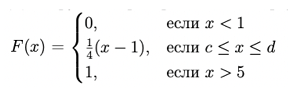

Find c and d; f(x); M(x); D(x); probability of x being [1;2].

In [33]:
# 1. The function is continuous by definition, so c = 1, d = 5
# Verification
x = Symbol('x')

# Given CDF
F = Piecewise((0, x<=1), 
              ((x-1)/4, x<=5), 
              (1, True))
# PDF
f = F.diff()

# integral f(x) on the segment [0,1] must equal 1
integrate (f,(x, 1, 5))

1

In [28]:
# Expectation
M = integrate(x * f,(x,-oo, 1)) + \
    integrate(x * f,(x,1,5)) + \
    integrate(x * f,(x,5,oo))

# Variance
D = integrate(x**2 * f,(x,-oo, 1)) + \
    integrate(x**2 * f,(x, 1, 5)) + \
    integrate(x**2 * f,(x, 5, oo)) - \
    M**2

# Probability of x being [1;2]
P = F.subs({x:2}) - F.subs({x:1})

# Answer
print (f'Given CDF:')
display (F)
print (f'PDF:')
display (f)
print (f'Expected value: {M}\n' 
       f'Variance: {D}\n' 
       f'Probability of x being [1;2]: {P}')

Given CDF:


Piecewise((0, x <= 1), (x/4 - 1/4, x <= 5), (1, True))

PDF:


Piecewise((0.0326086956521739*x**2 + 0.0652173913043478*x, (x >= 2) & (x <= 4)), (0, True))

Expected value: 3.17391304347826
Variance: 0.308884688090737
Probability of x being [1;2]: 1/4


## Task 14 Uniform distribution
It is known that all values of a uniformly distributed random variable lie in the interval [3;9]. 
Find the probability that this random variable falls into the interval (5;7)

In [6]:
# In a uniform distribution, the probability density is a constant. 
# So the PDF looks like F(x) = px
# The integral under the definition space f(x) is equal to 1 and is equal to F(xn) - F(x0)

F_int = x*9 - x*3 - 1
p = solve (F_int,x)
p57 = 7*p[0] - 5*p[0]
print (f'Probability of the random variable to fall into the interval (5;7) is: {p57}')

Probability of the random variable to fall into the interval (5;7) is: 1/3


## Task 15 Normal distribution
Random variable X has a normal distribution with expectation a = 5 and variance D(x) = 9. 
Find the probability that this random variable falls into the interval (7;12)

In [7]:
Φ1 = round((7 - 5)/sqrt(9), 4)
Φ2 = round((12 - 5)/sqrt(9), 4)
print (Φ2, Φ1)

2.3333 0.6667


In [8]:
# P = Φ2(2.33) - Φ1(0.66)
P = round(0.4898 - 0.2454, 2)
print (f'Probability of the random variable to fall into the interval (7;12) is: {P}')

Probability of the random variable to fall into the interval (7;12) is: 0.24


## Task 16 Normal distribution
Determine PDF of a normally distributed random variable X, if  M(x) = 4 and D(x) = 12. 
Find the probability of the random variable to fall into the interval (6;10).

In [12]:
x, mu, sigma = symbols('x, mu, sigma')

def pdf (x, mu, sigma): 
    return (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))

P6_10 = round (integrate (pdf(x, 4, 2*sqrt(3)), (x,6,10)), 2)
P6_10

0.24

# Random value generation

## Task 17 Multiplicative method 
Using the multiplicative method, make a sequence of 10 random numbers.

In [17]:
def randomizer ():
    random_set = {}
    a = (int(input('enter prime number a>0')))
    c = a*2+1 # making a prime number to lengthen the period of the sequence
    m = c**2+1 # the same
    x = random.random()
    
    for i in range (1,11):
        x = (x*a + c)%m
        random_set[i] = x
    
    return random_set

randomizer ()

enter prime number a>0 5


{1: 15.12667461409601,
 2: 86.63337307048005,
 3: 78.16686535240024,
 4: 35.83432676200118,
 5: 68.17163381000591,
 6: 107.85816905002957,
 7: 62.29084525014787,
 8: 78.45422625073934,
 9: 37.271131253696694,
 10: 75.35565626848347}

## Task 18 Inverse function
Some random variable is given by the exponential distribution law

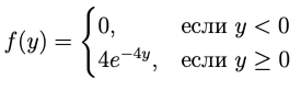

Generate 10 random numbers

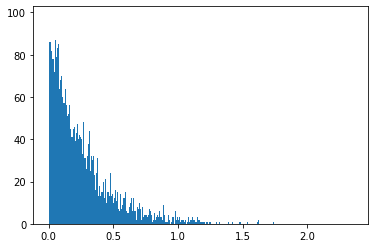

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lam =4

exp_values = []
for _ in range (10000):
    exp_rand = -np.log(np.random.uniform(0,1))/lam
    exp_values.append(exp_rand)

plt.hist (exp_values, bins=1000)
plt.show()

# Statistical tests

## Task 20 T-test
The mean life expectancy of men in the overall population is known to be µ0 = 75 years. We have a sample of men with life expectancies of 56, 81, 72, 65, 67, 62 and 70 years. Test H0 hypothesis: the average life expectancy of men in the sample equals the population average, µ0 = µ1.

In [20]:
sample = [56, 81, 72, 65, 67, 62, 70]
µ0 = 75.1
n = len(sample)

# sample mean and unbiased sample standard deviation
x_bar = sum(sample) / n
s = sqrt(sum([(x - x_bar)**2 for x in sample]) / (n-1))

# t-test and p-value for a two-tailed test
ts = float((x_bar - µ0) / (s / sqrt(n)))
p_value = 2 * t.cdf(ts, df=n-1)

print (f'If a = 5%, Ho should be rejected, because p_value = {p_value:.2}\n'
       f'Mean life expectancy of men in the sample \n'
       f'is statistically significantly different from the general mean')

If a = 5%, Ho should be rejected, because p_value = 0.046
Mean life expectancy of men in the sample 
is statistically significantly different from the general mean


## Task 21 T-test
After analyzing a sample of size n = 35, the average weight of products produced at the factory was determined to be µ1 = 144 g. The standard weight of parts is µ0 = 135 g. The sample has a standard deviation of σ = 50 g. The objective is to test the null hypothesis that the means are equal: µ0 = µ1.

In [21]:
µ0 = 135
x_bar, n, s = 144, 35, 50

# t-test and p-value for a two-tailed test 
ts = float((x_bar - µ0) / (s / sqrt(n)))
p_value = 2 * t.cdf(ts, df=n-1)

print (f'If a = 5%, Ho cannot be rejected, because p_value = {p_value:.2}\n'
      f'Result: the value of {x_bar} is an admissible norm for the state standard.')

If a = 5%, Ho cannot be rejected, because p_value = 1.7
Result: the value of 144 is an admissible norm for the state standard.


## Task 22 Confidence interval
According to statistics, in a certain city in 100 catering establishments, the average number of employees is 12.4 with a standard deviation of 4.8. Determine the confidence interval of 95% of the number of catering workers.

In [22]:
n, x_bar, s = 100, 12.4, 4.8
alfa = 0.05

# percent point function (inverse of cdf)
t_crit = t.ppf (1-alfa/2, n-1)

lower = x_bar-t_crit*s/sqrt(n)
upper = x_bar+t_crit*s/sqrt(n)

print (f'The 95% confidence interval is between {lower:.3} '
       f'and {upper:.4}')

The 95% confidence interval is between 11.4 and 13.35


## Task 23 Confidence interval
For a random sample of 54 observations, the following quantities are known:
- Sum of values in observations is $450$
- Sum of squared deviation of values from the mean is $2600$

Determinr the 95% confidence interval for the expected value

In [25]:
n = 54
s = sqrt(2600 / (n-1))
x_bar = 450/n
alfa = 0.05

# percent point function (inverse of cdf)
t_crit = t.ppf (1-alfa/2, n-1)

lower = x_bar-t_crit*s/sqrt(n)
upper = x_bar+t_crit*s/sqrt(n)

print (f'The 95% confidence interval is between {lower.n():.3} '
       f'and {upper.n():.4}')

The 95% confidence interval is between 6.42 and 10.25


## Task 24 Mann-Whitney test
Two random variables X and Y are not normally distributed. The null hypothesis of equality of means, µx = µy, is to be tested using the nonparametric Mann-Whitney test.
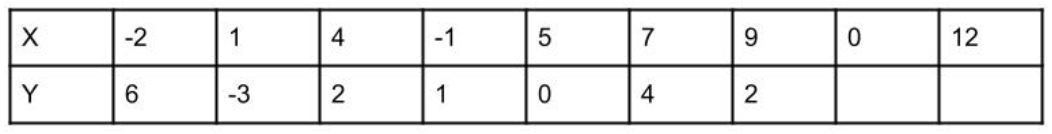

In [24]:
X = (-2,1,4,-1,5,7,9,0,12)
Y = (6,-3,2,1,0,4,2)
Xn = len(X)
Yn = len(Y)

U_crit_param = ('two-tailed, n=9, m=7, alfa = 0.05')
U_crit = 12

ranks = rankdata (X+Y)
ranks_x, ranks_y = ranks[:Xn], ranks[Xn : Xn+Yn]
Rx, Ry  = sum(ranks_x), sum(ranks_y)

U1 = Xn*Yn + Xn*(Xn+1)/2 - Rx
U2 = Xn*Yn + Yn*(Yn+1)/2 - Ry

print (f'U-test for two samples makes {min(U1,U2)}\n'
       f'For given parameters: {U_crit_param} \n'
       f'the threshold U-value is {U_crit}.\n'
       f'Since {min(U1,U2)} > {U_crit}, H0 is to be accepted')

U-test for two samples makes 24.5
For given parameters: two-tailed, n=9, m=7, alfa = 0.05 
the threshold U-value is 12.
Since 24.5 > 12, H0 is to be accepted
